Labor 4: Spektrogramm, AKF, Periodogramm, H(z)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy.signal import find_peaks, correlate, periodogram, welch

a: Berechnen und plotten Sie das Spektrogramm eines von Ihnen erstellten Audiotextes ("Dies
ist eine Suchmaschine."). Erstellen Sie ein Schmallband- und Breitband-Spektrogramm.
Wann erfolgt ein sichtbarer √úbergang zwischen dem Schmallband- und dem
Breitbandspektrum? Erkl√§ren Sie das Verhalten? Extrahieren Sie anschlie√üend Formanten
aus ihrem Spektrum und versuchen Sie diese einzelnen Vokalen zuzuordnen. Welchen
Zeitbereichen k√∂nnen Sie Konsonanten zuordnen? Warum ist diese Zuordnung eindeutig?

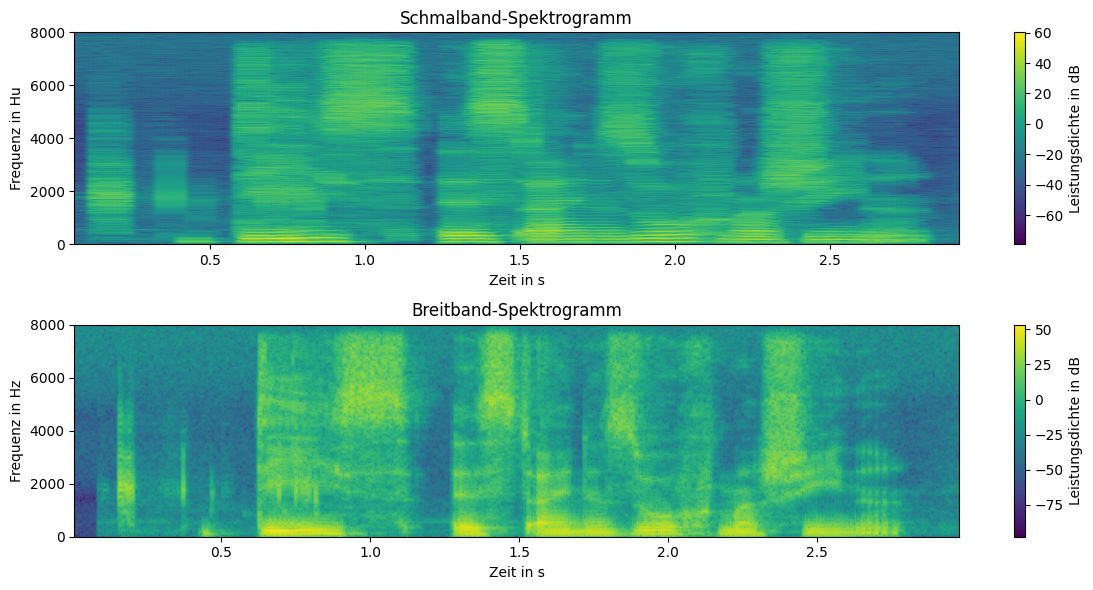

In [2]:
sample_rate, audio_data = wavfile.read("suchmaschine.wav")

nperseg_schmal = 2048
noverlap_schmal = 1800
f_schmal, t_schmal, Sxx_schmal = signal.spectrogram(audio_data, fs=sample_rate, nperseg=nperseg_schmal, noverlap=noverlap_schmal)

nperseg_breit = 256
noverlap_breit = 200
f_breit, t_breit, Sxx_breit = signal.spectrogram(audio_data, fs=sample_rate, nperseg=nperseg_breit, noverlap=noverlap_breit)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(t_schmal, f_schmal, 10 * np.log10(Sxx_schmal), shading='gouraud')
plt.ylabel('Frequenz in Hu')
plt.xlabel('Zeit in s')
plt.title('Schmalband-Spektrogramm')
plt.colorbar(label='Leistungsdichte in dB')
plt.ylim([0, 8000])

plt.subplot(2, 1, 2)
plt.pcolormesh(t_breit, f_breit, 10 * np.log10(Sxx_breit), shading='gouraud')
plt.ylabel('Frequenz in Hz')
plt.xlabel('Zeit in s')
plt.title('Breitband-Spektrogramm')
plt.colorbar(label='Leistungsdichte in dB')
plt.ylim([0, 8000])

plt.tight_layout()
plt.show()

Berrechnung und Plattung von Schmalband- und Breitband-Spektrogramme eines Audiotextes aus einer WAV-Datei, um die Leistungsdichte √ºber Zeit und Frequenz darzustellen. Dabei werden unterschiedliche Fenstergr√∂√üen und √úberlappungen verwendet, um die zeitliche und frequenzielle Aufl√∂sung zu variieren.

Der sichtbare √úbergang zwischen dem Schmalband- und dem Breitbandspektrum erfolgt durch die unterschiedlichen Fenstergr√∂√üen: Schmalband zeigt feine Frequenzdetails, w√§hrend Breitband schnelle zeitliche √Ñnderungen darstellt. Dies liegt an dem Kompromiss zwischen zeitlicher und frequenzieller Aufl√∂sung.

b: Extrahieren Sie aus ihrer Sprachnachricht jeweils einen Vokal und einen Konsonaten und
berechnen die zugeh√∂rige Autokorrelationsfunktion. Erkl√§ren Sie die Unterschiede zwischen
der AKF eines Konsonaten und der AKF eines Vokals

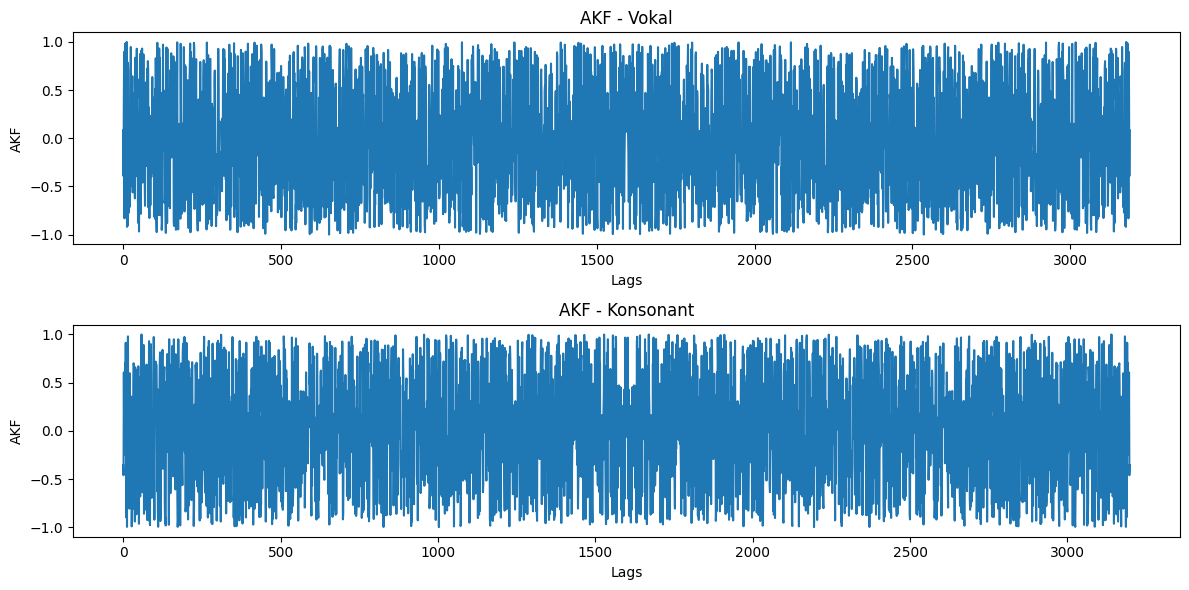

In [3]:
sample_rate_vokal, vokal_data = wavfile.read("vokal.wav")
sample_rate_konsonant, konsonant_data = wavfile.read("konsonant.wav")

akf_vokal = correlate(vokal_data, vokal_data, mode='full')
akf_vokal = akf_vokal / np.max(akf_vokal)

akf_konsonant = correlate(konsonant_data, konsonant_data, mode='full')
akf_konsonant = akf_konsonant / np.max(akf_konsonant)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(akf_vokal)
plt.title('AKF - Vokal')
plt.xlabel('Lags')
plt.ylabel('AKF')

plt.subplot(2, 1, 2)
plt.plot(akf_konsonant)
plt.title('AKF - Konsonant')
plt.xlabel('Lags')
plt.ylabel('AKF')

plt.tight_layout()
plt.show()

Hier werden die Audiodaten von zwei WAV-Dateien (Vokal und Konsonant) eingelesen, ihre AKF berechnet, normiert und anschlie√üend in zwei Diagrammen visualisiert, um die Unterschiede in den akustischen Eigenschaften darzustellen. Vokale zeigen in ihrer AKF eine regelm√§√üige, periodische Struktur aufgrund gleichm√§√üiger Stimmbandschwingungen. Konsonanten hingegen zeigen eine unregelm√§√üige Struktur, da sie durch Turbulenzen und abrupte Luftstrom√§nderungen entstehen.

c: Bestimmen und plotten Sie das Periodogramm und das Welch-Leistungsspektrum eines
Konsonanten. Vergleichen Sie die beiden Diagramme.

C:\Users\dzaen\AppData\Local\Temp\ipykernel_3352\2934251289.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_periodogram, 10 * np.log10(Pxx_periodogram))


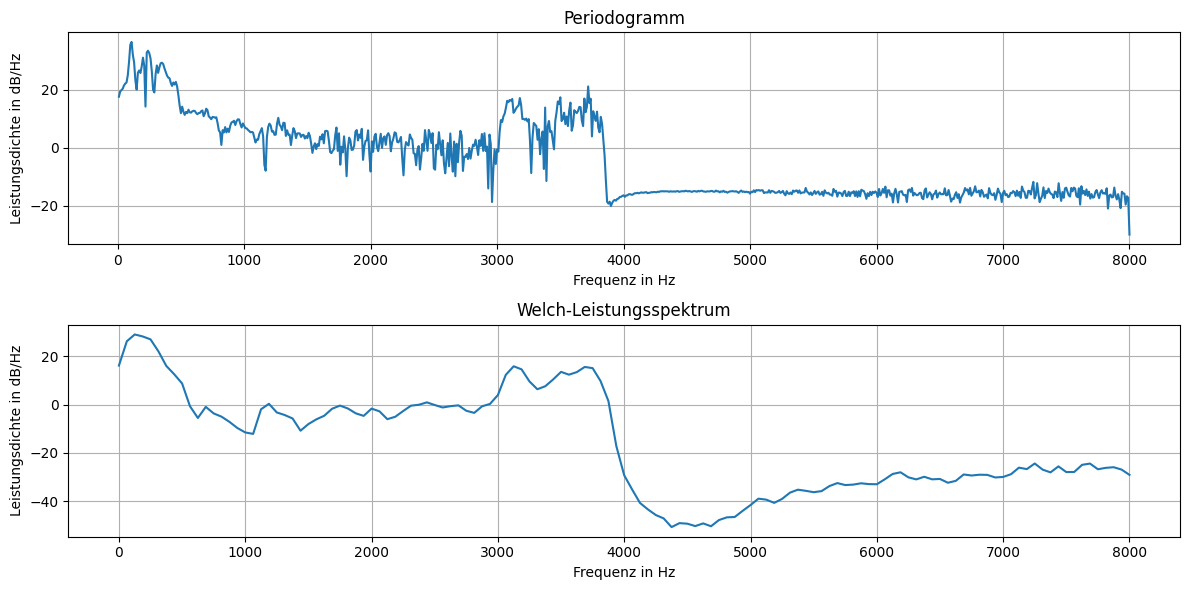

In [4]:
f_periodogram, Pxx_periodogram = periodogram(konsonant_data, sample_rate_konsonant)

f_welch, Pxx_welch = welch(konsonant_data, sample_rate_konsonant, nperseg=256, noverlap=128)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f_periodogram, 10 * np.log10(Pxx_periodogram))
plt.title('Periodogramm')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(f_welch, 10 * np.log10(Pxx_welch))
plt.title('Welch-Leistungsspektrum')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.tight_layout()
plt.show()


In diesem Code werden das Periodogramm und das Welch-Leistungsspektrum des Konsonant-Audiosignals berechnet und in zwei Diagrammen visualisiert, um die Leistungsdichte √ºber verschiedene Frequenzen hinweg darzustellen. Das Periodogramm zeigt detaillierte Frequenzkomponenten eines Konsonanten, jedoch mit hoher Varianz und einem rauschigen Erscheinungsbild, w√§hrend das Welch-Leistungsspektrum eine glattere und stabilere Sch√§tzung der Leistungsdichte liefert, jedoch mit geringerer Frequenzaufl√∂sung.

d: Modellieren Sie nun wei√ües Gau√ü'sches Rauschen mit den Parametern ùúá = 0, ùúé = 1 .
Plotten Sie dazu ein Oszillogramm der L√§nge von 1s mit einer Abtastrate f$ = 8000Hz.

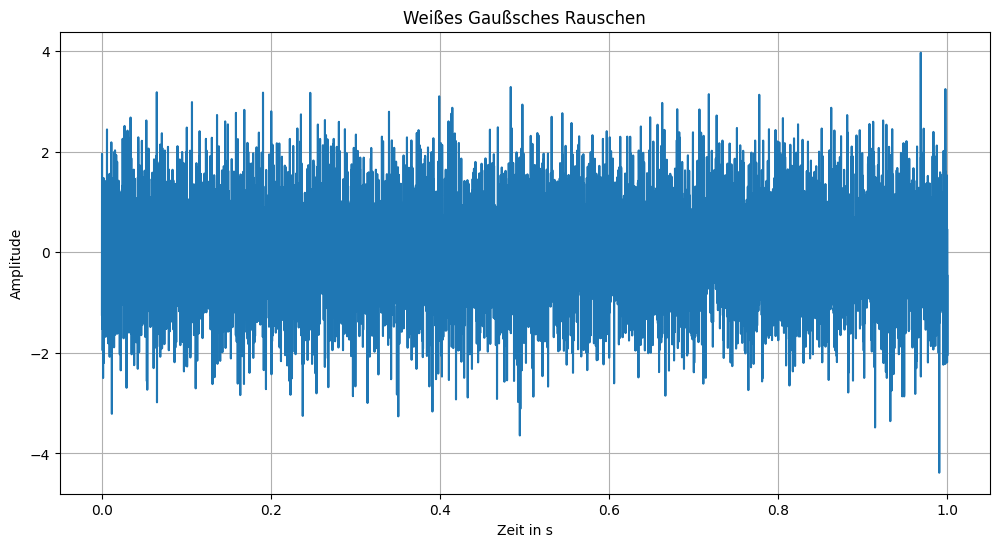

In [5]:
fs = 8000
mu = 0
sigma = 1
duration = 1

num_samples = int(fs * duration)
white_noise = np.random.normal(mu, sigma, num_samples)
time = np.linspace(0, duration, num_samples, endpoint=False)

plt.figure(figsize=(12, 6))
plt.plot(time, white_noise)
plt.title("Wei√ües Gau√üsches Rauschen")
plt.xlabel("Zeit in s")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Es wird ein 1-sek√ºndiges wei√ües Gau√ü'sches Rauschen mit einer Abtastrate von 8000 Hz erzeugt und dessen Amplitude √ºber die Zeit in einem Diagramm visualisiert.

e: Berechnen und plotten sie die AKF des soeben modellierten Rauschsignals. Berechnen Sie
zus√§tzlich aus der AKF die spektrale Leistungsdichte. Vergleichen und diskutieren Sie die
Diagramme

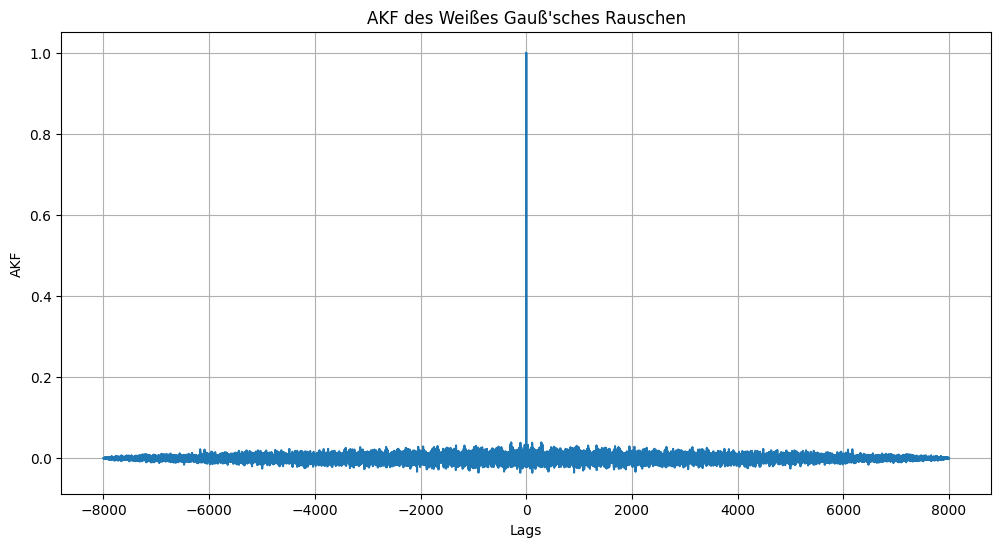

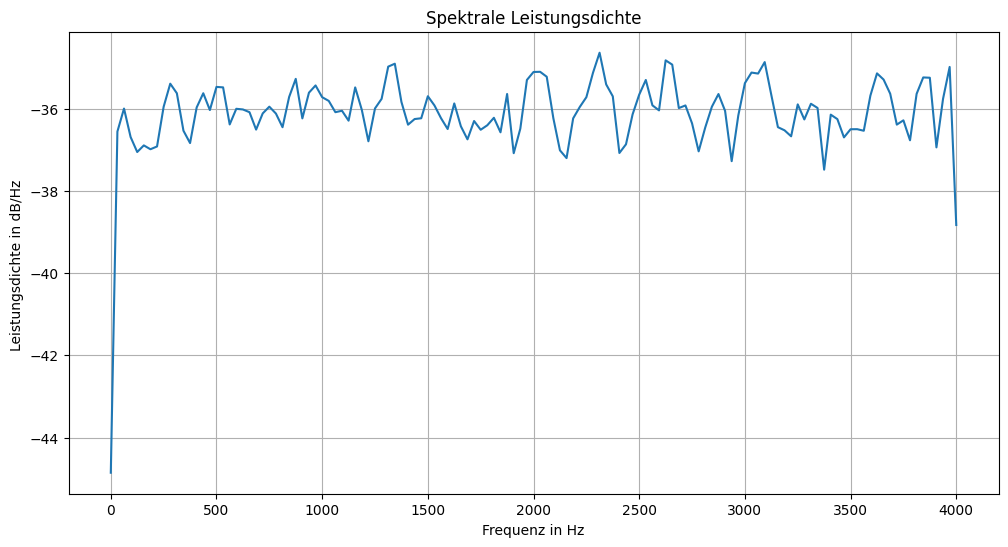

In [6]:
akf = correlate(white_noise, white_noise, mode='full')
lags = np.arange(-num_samples + 1, num_samples)
akf = akf / np.max(akf)

plt.figure(figsize=(12, 6))
plt.plot(lags, akf)
plt.title("AKF des Wei√ües Gau√ü'sches Rauschen")
plt.xlabel("Lags")
plt.ylabel("AKF")
plt.grid()
plt.show()

f_welch, Pxx_welch = welch(white_noise, fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(12, 6))
plt.plot(f_welch, 10 * np.log10(Pxx_welch))
plt.title("Spektrale Leistungsdichte")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Leistungsdichte in dB/Hz ")
plt.grid()
plt.show()


Die AKF und das Welch-Leistungsspektrum f√ºr das wei√ües Gau√ü'sches Rauschen wird berechnet und visualisiert. Die AKF zeigt, dass wei√ües Rauschen nur bei Lag = 0 korreliert und bei allen anderen Lags nahezu null ist, w√§hrend die spektrale Leistungsdichte gleichm√§√üig √ºber alle Frequenzen verteilt ist, was best√§tigt, dass das wei√üe Rauschen alle Frequenzen gleichm√§√üig abdeckt.

f: Bestimmen und plotten Sie jetzt das Welch-Leistungsspektrum des wei√üen Gau√ü'schen
Rauschen und vergleichen Sie es mit der in vorheriger Teilaufgabe bestimmten
Leistungsspektrum.

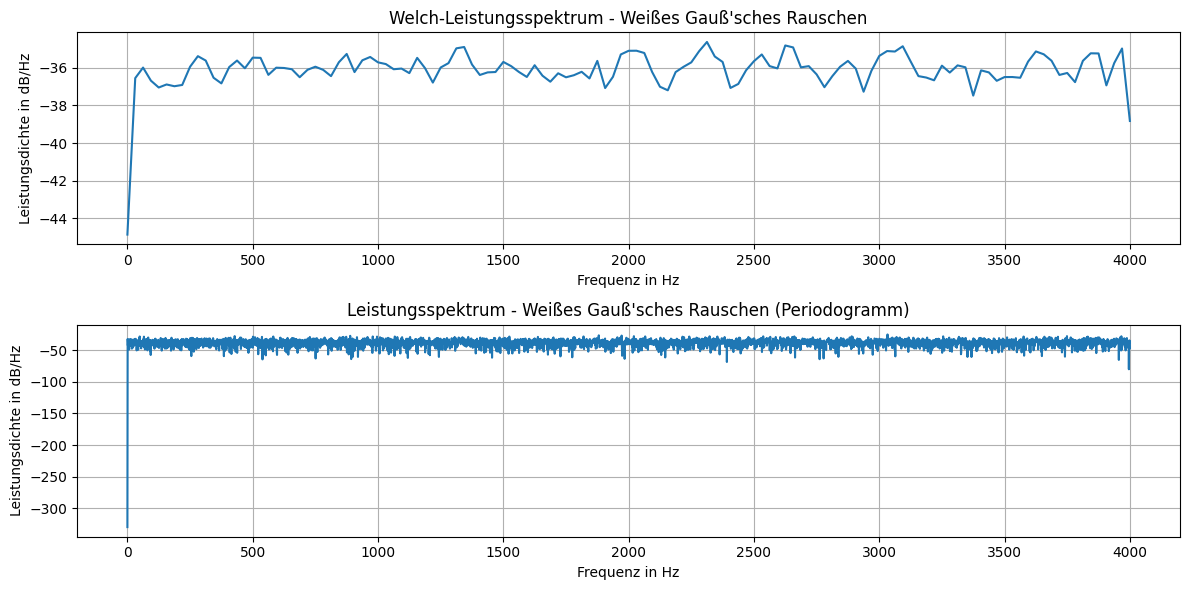

In [7]:
f_periodogram, Pxx_periodogram = periodogram(white_noise, fs=fs)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f_welch, 10 * np.log10(Pxx_welch))
plt.title('Welch-Leistungsspektrum - Wei√ües Gau√ü\'sches Rauschen')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(f_periodogram, 10 * np.log10(Pxx_periodogram))
plt.title('Leistungsspektrum - Wei√ües Gau√ü\'sches Rauschen (Periodogramm)')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.tight_layout()
plt.show()


In diesem Code werden das Welch-Leistungsspektrum und das Periodogramm f√ºr wei√ües Gau√ü'sches Rauschen berechnet und in zwei Diagrammen visualisiert, um die Leistungsdichte √ºber verschiedene Frequenzen hinweg darzustellen. Das Welch-Leistungsspektrum ist glatter und stabiler, da es √ºberlappende Segmente verwendet und die Varianz reduziert. Im Gegensatz dazu ist das Periodogramm detaillierter, aber rauschiger, da es die spektrale Leistungsdichte direkt aus dem gesamten Signal berechnet.